In [9]:
import pandas as pd
df = pd.read_excel("Database_EnergyandBuildings.xlsx", header = 1)
df.rename(columns = {'Unnamed: 0':'Time'}, inplace = True)
df.fillna(0, inplace = True)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)

KeyboardInterrupt: 

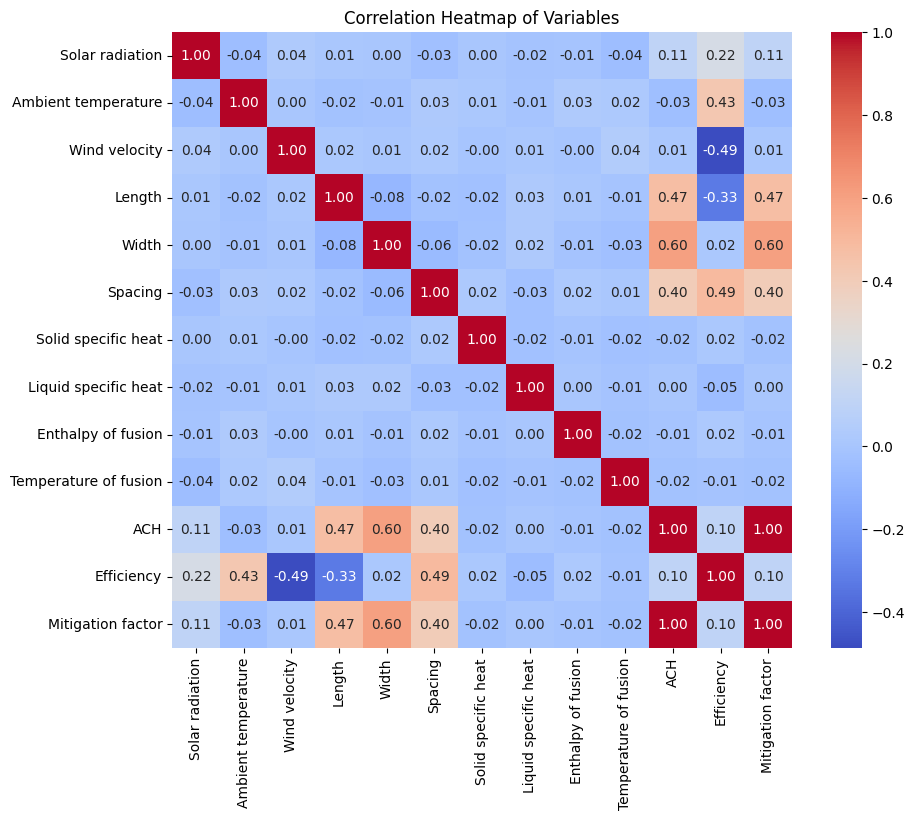

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Variables')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
X = df[['Solar radiation', 'Ambient temperature', 'Wind velocity', 'Length', 'Width', 'Spacing', 'Solid specific heat', 'Liquid specific heat', 'Enthalpy of fusion', 'Temperature of fusion']]
y = df['ACH']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const).fit()
print(ols_model.summary())


Mean Squared Error (MSE): 0.18036468983102277
                            OLS Regression Results                            
Dep. Variable:                    ACH   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     843.8
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:39:06   Log-Likelihood:                -859.65
No. Observations:                1519   AIC:                             1741.
Df Residuals:                    1508   BIC:                             1800.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X = df[['Solar radiation', 'Ambient temperature', 'Wind velocity', 'Length', 'Width', 'Spacing', 'Solid specific heat', 'Liquid specific heat', 'Enthalpy of fusion', 'Temperature of fusion']]
y = df['ACH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)

train_df = pd.DataFrame({'Actual': y_train.values, 'Predicted': y_train_pred})
test_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_test_pred})


In [ ]:
train_df

,Actual,Predicted
0,1.926220,1.926220
1,0.571335,0.571335
2,0.148526,0.148526
3,1.388062,1.388062
4,2.130756,2.130756
...,...,...
1514,0.997370,0.997370
1515,0.600341,0.600341
1516,2.547771,2.547771
1517,0.802709,0.802709


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_true_train = train_df.iloc[:, 0]  # First column contains y_true
y_pred_train = train_df.iloc[:, 1]  # Second column contains y_pred

mse = mean_squared_error(y_true_train, y_pred_train)
sse = np.sum((y_true_train - y_pred_train)**2)
mape = calculate_mape(y_true_train, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true_train, y_pred_train)
mpe = np.mean((y_true_train - y_pred_train) / y_true_train) * 100
r_squared = 1 - (sse / np.sum((y_true_train - np.mean(y_true_train))**2))

mse_train = round(mse, 4)
sse_train = round(sse, 4)
mape_train = round(mape, 4)
rmse_train = round(rmse, 4)
mae_train = round(mae, 4)
mpe_train = round(mpe, 4)
r_squared_train = round(r_squared, 4)

indicators_df_train = pd.DataFrame({
    'MSE': [mse],
    'SSE': [sse],
    'MAPE': [mape],
    'RMSE': [rmse],
    'MAE': [mae],
    'MPE': [mpe],
    'COD': [r_squared],
})

indicators_df_train


,MSE,SSE,MAPE,RMSE,MAE,MPE,COD
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
test_df

,Actual,Predicted
0,1.521751,1.160124
1,1.884893,1.450716
2,2.904999,2.761972
3,0.206555,0.332943
4,2.497101,2.509434
...,...,...
375,1.411173,1.820552
376,0.287208,0.176874
377,0.798510,0.801318
378,0.708559,0.754577


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_true_test = test_df.iloc[:, 0]  # First column contains y_true_test
y_pred_test = test_df.iloc[:, 1]  # Second column contains y_pred_test

def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mse = mean_squared_error(y_true_test, y_pred_test)
sse = np.sum((y_true_test - y_pred_test)**2)
mape = calculate_mape(y_true_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true_test, y_pred_test)
mpe = np.mean((y_true_test - y_pred_test) / y_true_test) * 100
r_squared = 1 - (sse / np.sum((y_true_test - np.mean(y_true_test))**2))

mse_test = round(mse, 4)
sse_test = round(sse, 4)
mape_test = round(mape, 4)
rmse_test = round(rmse, 4)
mae_test = round(mae, 4)
mpe_test = round(mpe, 4)
r_squared_test = round(r_squared, 4)

indicators_df_test = pd.DataFrame({
    'MSE': [mse_test],
    'SSE': [sse_test],
    'MAPE': [mape_test],
    'RMSE': [rmse_test],
    'MAE': [mae_test],
    'MPE': [mpe_test],
    'COD': [r_squared_test],
})

indicators_df_test


,MSE,SSE,MAPE,RMSE,MAE,MPE,COD
0,0.1062,40.3712,20.8911,0.3259,0.2355,-4.8983,0.9074


In [ ]:
Decisiontreeindicators = pd.concat([indicators_df_train, indicators_df_test])

Decisiontreeindicators['Dataset'] = ['Training data', 'Testing data']

Decisiontreeindicators = Decisiontreeindicators[['Dataset', 'MSE', 'SSE', 'MAPE', 'RMSE', 'MAE', 'MPE', 'COD']]

Decisiontreeindicators

,Dataset,MSE,SSE,MAPE,RMSE,MAE,MPE,COD
0,Training data,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
0,Testing data,0.1062,40.3712,20.8911,0.3259,0.2355,-4.8983,0.9074


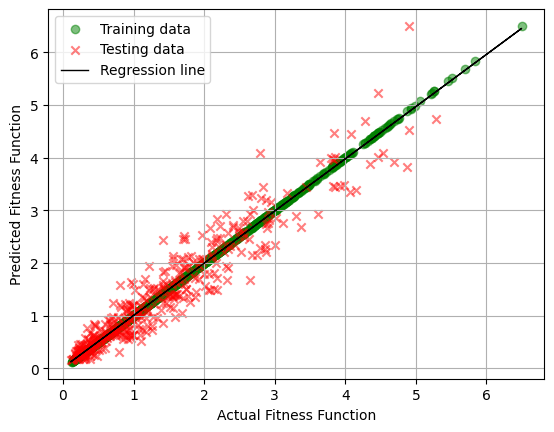

Equation of the regression line: y = 0.9907x + 0.0136


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

x_train = train_df.iloc[:, 0]
y_train = train_df.iloc[:, 1]

x_test = test_df.iloc[:, 0]
y_test = test_df.iloc[:, 1]

plt.scatter(x_train, y_train, color='green', label='Training data', alpha=0.5)

plt.scatter(x_test, y_test, color='red', marker='x', label='Testing data', alpha=0.5)

x_combined = np.concatenate((x_train, x_test)).reshape(-1, 1)
y_combined = np.concatenate((y_train, y_test))

regression_model_combined = LinearRegression().fit(x_combined, y_combined)

y_pred_combined = regression_model_combined.predict(x_combined)

plt.plot(np.concatenate((x_train, x_test)), y_pred_combined, color='black', linestyle='-', linewidth=1, label='Regression line')

plt.xlabel('Actual Fitness Function')
plt.ylabel('Predicted Fitness Function')
plt.legend()

plt.grid(True)
plt.show()

slope = regression_model_combined.coef_[0]
intercept = regression_model_combined.intercept_

print("Equation of the regression line: y = {:.4f}x + {:.4f}".format(slope, intercept))
